In [33]:
import pandas as pd
import openpyxl
import json
import requests
import matplotlib.pyplot as plt

In [7]:
def selectquote(ticker, statement):
    r= requests.get(f"https://financialmodelingprep.com/api/v3/{statement}/{ticker}?limit=120&apikey=eb29218df82acef0486b5c014ccec868")
    r = r.json()
    return r


#### Read ticker symbols of stocks from etoro sheet (exported to another document)

In [8]:
etoro_lists = 'D:\lianz\Desktop\Python\data_science_discovery\personal_finance\etoro_listings\etoro-account-statement-10-1-2021-12-23-2022.xlsx'
investment_history = pd.read_excel(etoro_lists,sheet_name='Account Activity')

In [9]:
# tickers = investment_history[investment_history['Asset type'] == 'Stocks']['Details'].str.split('/',expand=True)[0].unique()

from tickerlist import tickers
tickers

['UAL',
 'AF.PA',
 'T',
 'JNJ',
 'DIS',
 'AAPL',
 'TSLA',
 'JPM',
 'GOOG',
 'AMD',
 'INGA.NV',
 'SHEL.L',
 'SMSN.L',
 'WMT',
 'NVDA',
 'WBD',
 'MMM',
 'AMZN',
 'COST']

#### Request statements of each ticker symbol and store in 'personal_finance\income_statements' folder

In [2]:
possible_statements = ['income-statement','balance-sheet-statement','cash-flow-statement']

In [11]:
exec(f"{possible_statements[0]}.split('-')")

NameError: name 'income' is not defined

In [11]:
def save_to_json(ticker_symbol,statement):
    
    file = selectquote(ticker_symbol,statement)

    with open(f'D:\lianz\Desktop\Python\data_science_discovery\personal_finance\{statement}/{ticker_symbol}.json', 'w+') as f:
        json.dump(file, f, indent=4)
    

#### Only run this when there is a new income_statement available

In [ ]:
# improvement: append to existing json file instead of rewriting to it with past 5 years, so longer term data can be acquired

In [32]:
for x in tickers:
    for y in possible_statements:
        save_to_json(x,y)

#### Read in json files (requests not made repetitively)

In [12]:
def read_json(ticker_list, statement):

    with open(f'D:\lianz\Desktop\Python\data_science_discovery\personal_finance\{statement}/{ticker_list}.json') as json_file:
        x = json.load(json_file)

    return x

In [13]:
company_statements = ['income-statement',
                      'cash-flow-statement', 'balance-sheet-statement']

In [14]:
d = read_json(tickers[0],company_statements[0])

In [15]:
[d[i]['calendarYear'] for i in range(len(d))]

['2021', '2020', '2019', '2018', '2017']

In [23]:
d[0].items()

dict_items([('date', '2021-12-31'), ('symbol', 'UAL'), ('reportedCurrency', 'USD'), ('cik', '0000100517'), ('fillingDate', '2022-02-18'), ('acceptedDate', '2022-02-18 16:16:13'), ('calendarYear', '2021'), ('period', 'FY'), ('revenue', 24634000000), ('costOfRevenue', 23913000000), ('grossProfit', 721000000), ('grossProfitRatio', 0.02926849070390517), ('researchAndDevelopmentExpenses', 0.0), ('generalAndAdministrativeExpenses', 0.0), ('sellingAndMarketingExpenses', 677000000), ('sellingGeneralAndAdministrativeExpenses', 677000000), ('otherExpenses', 412000000), ('operatingExpenses', 1089000000), ('costAndExpenses', 25002000000), ('interestIncome', 36000000), ('interestExpense', 1577000000), ('depreciationAndAmortization', 2485000000), ('ebitda', 1505000000), ('ebitdaratio', 0.06109442234310303), ('operatingIncome', -1022000000), ('operatingIncomeRatio', -0.04148737517252578), ('totalOtherIncomeExpensesNet', -1535000000), ('incomeBeforeTax', -2557000000), ('incomeBeforeTaxRatio', -0.10379

In [51]:
l = []
dict_holder = {}
for n in ['epsdiluted','netIncome','revenue']:
    for i,x in enumerate(d[::-1]):
        dict_holder[x['calendarYear']] = x[f'{n}']
    l.append(dict_holder)


print(l)

eps_df = pd.DataFrame.from_records(l, orient='index', columns=['epsdiluted'])
eps_df

[{'2017': 37736000000, '2018': 41303000000, '2019': 43259000000, '2020': 15355000000, '2021': 24634000000}, {'2017': 37736000000, '2018': 41303000000, '2019': 43259000000, '2020': 15355000000, '2021': 24634000000}, {'2017': 37736000000, '2018': 41303000000, '2019': 43259000000, '2020': 15355000000, '2021': 24634000000}]


TypeError: from_records() got an unexpected keyword argument 'orient'

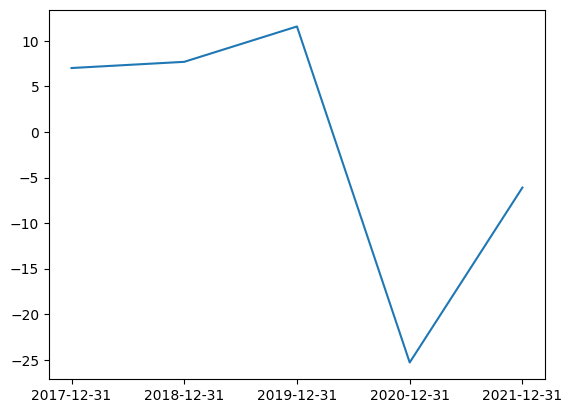

In [37]:
plt.plot(eps_df)

In [143]:
pd.DataFrame.from_dict(d[0:2]).T

,0,1
date,2021-12-31,2020-12-31
symbol,UAL,UAL
reportedCurrency,USD,USD
cik,0000100517,0000100517
fillingDate,2022-02-18,2021-03-01
acceptedDate,2022-02-18 16:16:13,2021-03-01 07:46:29
calendarYear,2021,2020
period,FY,FY
revenue,24634000000,15355000000
costOfRevenue,23913000000,20385000000
